In [1]:
import openeo

# connect with the backend
eoconn = openeo.connect("openeofed.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [2]:
## Setup of parameters
spat_ext = {
    "type": "Polygon",
    "coordinates": [
        [
            [5.170012098271149, 51.25062964728295],
            [5.17085904378298, 51.24882567194015],
            [5.17857421368097, 51.2468515482926],
            [5.178972704726344, 51.24982704376254],
            [5.170012098271149, 51.25062964728295],
        ]
    ],
}
temp_ext = ["2022-05-01", "2023-07-31"]

In [3]:
## Create a processing graph from the MOGPR process using an active openEO connection
mogpr = eoconn.datacube_from_process(
    "mogpr_s2",
    namespace="https://raw.githubusercontent.com/VITObelgium/openeo_algorithm_catalog/c025cdd72d8c3e97e11412774f440fcdf675dca6/mogpr_s2/openeo_udp/mogpr_s2.json",
    temporal_extent=temp_ext,
    spatial_extent=spat_ext,
)

In [4]:
# Execute the service as a batch process
mogpr_job = mogpr.create_job(
    title="MOGPR_example",
    job_options={
        "executor-memory": "1G",
        "executor-memoryOverhead": "500m",
        "python-memory": "3G",
    },
)
mogpr_job.start_and_wait()

0:00:00 Job 'cdse-j-2511261347384c1c8fb2f41076fb5d87': send 'start'
0:00:15 Job 'cdse-j-2511261347384c1c8fb2f41076fb5d87': created (progress 0%)
0:00:20 Job 'cdse-j-2511261347384c1c8fb2f41076fb5d87': created (progress 0%)
0:00:27 Job 'cdse-j-2511261347384c1c8fb2f41076fb5d87': created (progress 0%)
0:00:35 Job 'cdse-j-2511261347384c1c8fb2f41076fb5d87': created (progress 0%)
0:00:45 Job 'cdse-j-2511261347384c1c8fb2f41076fb5d87': queued (progress 0%)
0:00:57 Job 'cdse-j-2511261347384c1c8fb2f41076fb5d87': queued (progress 0%)
0:01:13 Job 'cdse-j-2511261347384c1c8fb2f41076fb5d87': queued (progress 0%)
0:01:32 Job 'cdse-j-2511261347384c1c8fb2f41076fb5d87': queued (progress 0%)
0:01:56 Job 'cdse-j-2511261347384c1c8fb2f41076fb5d87': queued (progress 0%)
0:02:26 Job 'cdse-j-2511261347384c1c8fb2f41076fb5d87': running (progress N/A)
0:03:04 Job 'cdse-j-2511261347384c1c8fb2f41076fb5d87': running (progress N/A)
0:03:51 Job 'cdse-j-2511261347384c1c8fb2f41076fb5d87': running (progress N/A)
0:04:49 Jo

<BatchJob job_id='cdse-j-2511261347384c1c8fb2f41076fb5d87'>

In [ ]:
results = mogpr_job.get_results()
results.download_files("output/mogpr/")

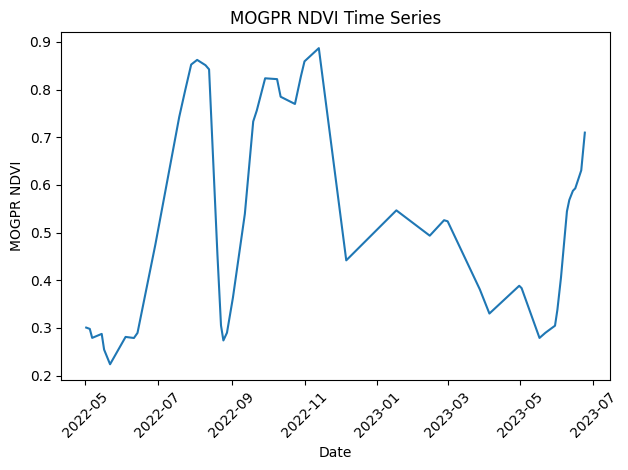

In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# read the json results into a pandas dataframe
with open("./mogpr_output.json", "r") as f:
    results = json.load(f)

# dict to dataframe
df = pd.DataFrame(
    {
        "date": pd.to_datetime(list(results.keys())),
        "values": [v[0][0] for v in list(results.values())],
    }
)

df = df.sort_values(by="date")

plt.plot(df["date"], df["values"])
plt.xlabel("Date")
plt.ylabel("MOGPR NDVI")
plt.title("MOGPR NDVI Time Series")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()